In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.datasets import load_wine

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle/Sleep_health_and_lifestyle_dataset.csv")
#hidf = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle/Sleep_health_and_lifestyle_dataset_test_hidden.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/sleep-health-and-lifestyle/Sleep_health_and_lifestyle_dataset_test_hidden.csv'

In [433]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: xlabel='Quality of Sleep', ylabel='Stress Level'>

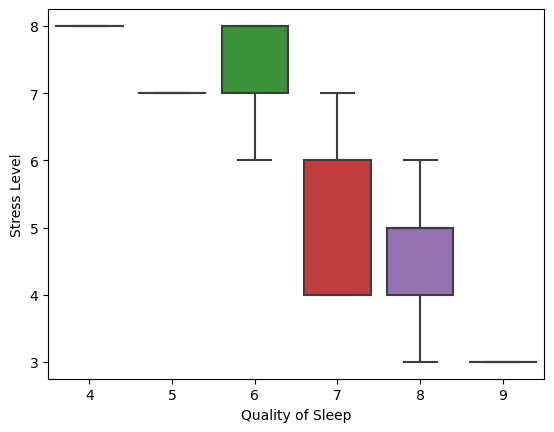

In [434]:
##Visualization
sns.boxplot(x="Quality of Sleep",y="Stress Level", data=df)

<Axes: xlabel='Gender', ylabel='Sleep Duration'>

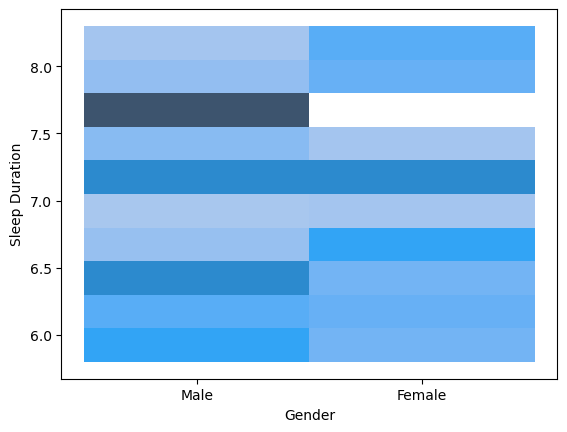

In [435]:
sns.histplot(x="Gender",y="Sleep Duration", data=df)
###

In [436]:
df['Sleep Disorder'].value_counts()

None           185
Insomnia        70
Sleep Apnea     61
Name: Sleep Disorder, dtype: int64

In [437]:
df["Sleep Disorder"].fillna("No Disorder",inplace=True)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                316 non-null    int64  
 1   Gender                   316 non-null    object 
 2   Age                      316 non-null    int64  
 3   Occupation               316 non-null    object 
 4   Sleep Duration           316 non-null    float64
 5   Quality of Sleep         316 non-null    int64  
 6   Physical Activity Level  316 non-null    int64  
 7   Stress Level             316 non-null    int64  
 8   BMI Category             316 non-null    object 
 9   Blood Pressure           316 non-null    object 
 10  Heart Rate               316 non-null    int64  
 11  Daily Steps              316 non-null    int64  
 12  Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB


In [439]:
df=df.drop(["Person ID","Blood Pressure","Heart Rate"],axis=1)

In [440]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea


In [441]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [442]:
df.dropna(axis = 1 , thresh=3, inplace = True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   316 non-null    object 
 1   Age                      316 non-null    int64  
 2   Occupation               316 non-null    object 
 3   Sleep Duration           316 non-null    float64
 4   Quality of Sleep         316 non-null    int64  
 5   Physical Activity Level  316 non-null    int64  
 6   Stress Level             316 non-null    int64  
 7   BMI Category             316 non-null    object 
 8   Daily Steps              316 non-null    int64  
 9   Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 24.8+ KB


In [444]:
y = df["Sleep Disorder"]
y.head()

0           None
1           None
2           None
3    Sleep Apnea
4    Sleep Apnea
Name: Sleep Disorder, dtype: object

In [445]:
df.drop(["Sleep Disorder"],axis=1, inplace = True)

In [2]:
#hidf_copy = hidf.copy()
#hidf_copy['Sleep Disorder'] = np.log(hidf_copy['Sleep Disorder'])
#hidf_copy['ram'] = np.log(hidf_copy['ram'])
#hidf_copy['ram'].var()

NameError: name 'hidf' is not defined

In [446]:
##preprocessing
from sklearn.preprocessing import OneHotEncoder

In [447]:
y= pd.get_dummies(y, columns=['Sleep Disorder'], prefix = ['Sleep Disorder'])
df = pd.get_dummies(df, columns=['Gender'], prefix = ['Gender'])
df = pd.get_dummies(df, columns=['BMI Category'], prefix = ['BMI Category'])
df = pd.get_dummies(df, columns=['Occupation'], prefix = ['Occupation'])
print(df.head())

   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
3   28             5.9                 4                       30   
4   28             5.9                 4                       30   

   Stress Level  Daily Steps  Gender_Female  Gender_Male  BMI Category_Normal  \
0             6         4200              0            1                    0   
1             8        10000              0            1                    1   
2             8        10000              0            1                    1   
3             8         3000              0            1                    0   
4             8         3000              0            1                    0   

   BMI Category_Normal Weight  ...  Occupation_Doctor  Occupation_Engineer  \
0                   

In [448]:
print(df)

     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0     27             6.1                 6                       42   
1     28             6.2                 6                       60   
2     28             6.2                 6                       60   
3     28             5.9                 4                       30   
4     28             5.9                 4                       30   
..   ...             ...               ...                      ...   
311   59             8.1                 9                       75   
312   59             8.0                 9                       75   
313   59             8.1                 9                       75   
314   59             8.1                 9                       75   
315   59             8.1                 9                       75   

     Stress Level  Daily Steps  Gender_Female  Gender_Male  \
0               6         4200              0            1   
1               8      

In [449]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
df = scaler.transform(df)

In [ ]:
#hidf_copy_1 = hidf_copy.copy()
#hidf_copy_1_scaled = ss.fit_transform(hidf_copy_1)
#hidf_copy_1_scaled_df = pd.DataFrame(hidf_copy_1_scaled, columns=hidf_copy_1.columns)
#hidf_copy_1_scaled_df.head()

In [450]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (252, 23)
x_test shape:  (64, 23)
y_train shape:  (252, 3)
y_test shape:  (64, 3)


In [451]:
###
from sklearn.ensemble import RandomForestClassifier

In [452]:
RNF = RandomForestClassifier()

In [453]:
RNF = RandomForestClassifier(n_estimators=200, criterion='entropy',max_features ='log2')
RNF.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200)

In [454]:
print(RNF.score(x_train,y_train), RNF.score(x_test,y_test))


0.9365079365079365 0.8125


In [455]:
RNF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200)

In [456]:
y_hat = RNF.predict(x_test)

In [457]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix,auc

In [458]:
print(accuracy_score(y_test, y_hat))

0.84375


In [459]:
print(classification_report(y_test, y_hat))
####

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.88      0.92      0.90        39
           2       0.77      0.71      0.74        14

   micro avg       0.86      0.84      0.85        64
   macro avg       0.85      0.79      0.81        64
weighted avg       0.86      0.84      0.85        64
 samples avg       0.84      0.84      0.84        64



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [485]:
X,y = load_wine(return_X_y = True)
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [490]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [491]:
DT = DecisionTreeClassifier(criterion='entropy')

In [493]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [495]:
print(DT.score(x_train,y_train), DT.score(x_test,y_test)
,DT.predict(x_test))

0.9166666666666666 0.78125 [[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


In [496]:
param_dict={"criterion":['grid','entropy'],
           "max_depth":range(1,10),
           "min_samples_split":range(1,10),
           "min_samples_leaf":range(1,5)}

In [497]:
grid=GridSearchCV(DT,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)
0.9090769230769231


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
778 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _va

In [ ]:
#DTBest.predict(hidf_copy_1_scaled_df)

In [ ]:
#def rocAuc(model, Xtest, ytest, model_name):
    #cols = model.classes_
    #y_test_binarized = pd.get_dummies(ytest, prefix=['Class'])
    #score = model.predict_proba(Xtest)
    
   # fpr = {}
    #tpr = {}
    #roc_auc = {}
    #for i in range(len(model.classes_)):
     #   fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:,i],score[:,i])
      #  roc_auc[i] = auc(fpr[i],tpr[i])
        
    #plt.figure(figsize=(4,4))
    #for i in range(len(model.classes_)):
     #   plt.plot(fpr[i],tpr[i], label=f'{cols[i]}-vs-Rest curve (area = %0.2f)' % roc_auc[i])
    
    #plt.plot([0,1],[0,1], 'k--')
    #plt.xlabel("False Positive Rate")
    #plt.ylabel('True Positive Rate')
    #plt.title(f"{model_name} Receiver Operation Characteristic")
    #plt.legend(loc='lower right')
    #plt.show()

In [ ]:
#rocAuc(RNF, x_test, y_test, 'RandomForestClassifier')